In [1]:
import numpy as np
import city_lab1 as ct
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline
#plt.rcParams['figure.figsize'] = [9.5, 4]

city = np.array([
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1]
])

start_state = ct.State(ct.Pos(0, 0), ct.Pos(1,2))

rewards = dict()
rewards["bank"] = 10
rewards["police"] = -50
rewards["impossible"] = 0

env_city = ct.City(city, restart_when_caught = True, restart_state = start_state.copy(), smart_police = True);
env_city.draw_city()

<IPython.core.display.Javascript object>


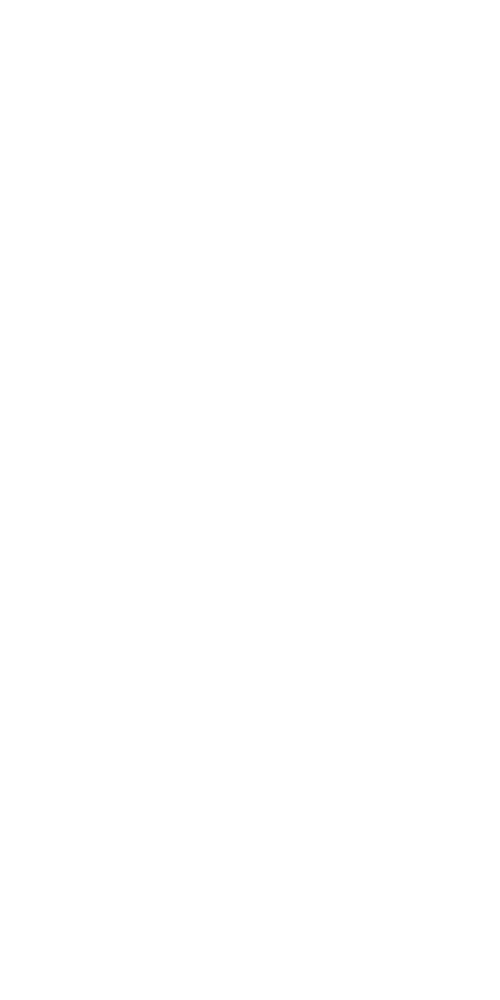

<IPython.core.display.Javascript object>


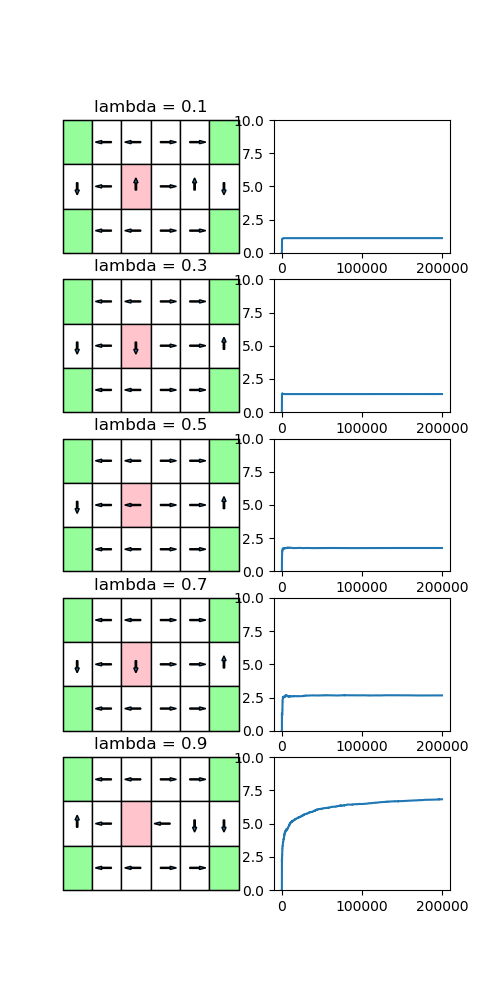

In [6]:
plt.figure();
%matplotlib notebook
plt.rcParams['figure.figsize'] = [5, 10]

for i, lambd in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    eps = 1
    player_start = ct.Pos(0,0)
    police_start = ct.Pos(1,2)

    if lambd == 0.9:
        n_iter = 200000
    else:
        n_iter = 200000

    #Q, V_t = ct.sarsa(env_city, lambd, eps, player_start, police_start, n_iter)
    Q, V_t = ct.q_learning(env_city, lambd, eps, player_start, police_start, n_iter)
    
    plt.subplot(5, 2, 2*i + 1);
    env_city.illustrate_policy(police_start, Q, title = "lambda = {}".format(lambd));
    
    plt.subplot(5, 2, 2*i + 2);
    plt.ylim(0, 10);
    plt.plot(V_t);

In [7]:
plt.savefig("task2_conv.pdf");